# Import e normalize nas colunas

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
df = pd.read_json(url)

# Normalizando as colunas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Junta tudo em um único DataFrame
TelecomX = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                      df_customer, df_phone, df_internet, df_account], axis=1)

# Conhecendo os dados

In [106]:
# Estatísticas descritivas para variáveis numéricas
print(TelecomX.describe())
print()
print(TelecomX.info())
print()
TelecomX.head()

       SeniorCitizen       tenure  Charges.Monthly
count    7043.000000  7043.000000      7043.000000
mean        0.162147    32.371149        64.761692
std         0.368612    24.559481        30.090047
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.500000
50%         0.000000    29.000000        70.350000
75%         0.000000    55.000000        89.850000
max         1.000000    72.000000       118.750000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   Phone

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [94]:
#não tem linhas duplicadas
duplicadas = TelecomX[TelecomX.duplicated()]

# Verificando a quantidade de valores nulos por coluna
print(TelecomX.isna().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [95]:
print('Valores unicos da coluna')
print(TelecomX['Churn'].unique())
print()
print('Soma dos valores unicos')
print(TelecomX['Churn'].value_counts())
print()
print('Verificando colunas com erros "" ')
print((TelecomX == '').sum())

Valores unicos da coluna
['No' 'Yes' '']

Soma dos valores unicos
No     5174
Yes    1869
        224
Name: Churn, dtype: int64

Verificando colunas com erros "" 
customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
dtype: int64


In [96]:
print(TelecomX['StreamingTV'].unique())
print()
print(TelecomX['StreamingTV'].value_counts())
print()
print(TelecomX['OnlineSecurity'].unique())
print()
print(TelecomX['OnlineSecurity'].value_counts())
print()
print(TelecomX['OnlineBackup'].unique())
print()
print(TelecomX['OnlineBackup'].value_counts())
print()
print(TelecomX['DeviceProtection'].unique())
print()
print(TelecomX['DeviceProtection'].value_counts())
print()
print(TelecomX['TechSupport'].unique())
print()
print(TelecomX['TechSupport'].value_counts())
print()
print(TelecomX['StreamingTV'].unique())
print()
print(TelecomX['StreamingTV'].value_counts())
print()
print(TelecomX['StreamingMovies'].unique())
print()
print(TelecomX['StreamingMovies'].value_counts())

['Yes' 'No' 'No internet service']

No                     2896
Yes                    2790
No internet service    1581
Name: StreamingTV, dtype: int64

['No' 'Yes' 'No internet service']

No                     3608
Yes                    2078
No internet service    1581
Name: OnlineSecurity, dtype: int64

['Yes' 'No' 'No internet service']

No                     3182
Yes                    2504
No internet service    1581
Name: OnlineBackup, dtype: int64

['No' 'Yes' 'No internet service']

No                     3195
Yes                    2491
No internet service    1581
Name: DeviceProtection, dtype: int64

['Yes' 'No' 'No internet service']

No                     3582
Yes                    2104
No internet service    1581
Name: TechSupport, dtype: int64

['Yes' 'No' 'No internet service']

No                     2896
Yes                    2790
No internet service    1581
Name: StreamingTV, dtype: int64

['No' 'Yes' 'No internet service']

No                     2870
Yes      

# TRATAMENTO DOS DADOS

In [97]:
#Filtro para excluir as linhas sem dados na coluna Churn
TelecomX = TelecomX[TelecomX['Churn'] != '']

Durante a análise, identifiquei 224 linhas com valores vazios ('') na coluna Churn. Ao examinar essas linhas, não foi possível encontrar um padrão específico que justificasse a ausência desses dados. Devido à falta de documentação do dataset, também não é possível entender claramente o motivo pelo qual essas informações estão ausentes. Como essas 224 entradas representam apenas cerca de 3% do total, optei por excluí-las para evitar impactos negativos em análises futuras.

In [42]:
#Transformando colunas em binárias
cols_binarias = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                 'PaperlessBilling', 'Churn', 'MultipleLines', 'PhoneService', 'Partner']

for col in cols_binarias:
    TelecomX[col] = TelecomX[col].replace({
        'Yes': 1, 
        'No': 0, 
        'No internet service': 0,
        'No phone service': 0
    }).astype('Int64') 


Observei que algumas colunas seriam mais úteis para a análise se fossem transformadas em colunas binárias. Para realizar esse tratamento, considerei importante alterar os valores "No internet service" e "No phone service" para "No", pois, como esses usuários não possuem os serviços, o mais adequado é representá-los como "No", facilitando a análise e a transformação dos dados.

In [43]:
#Verificando como ficou o dataset
TelecomX.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4


# Análise dos dados e visualização

Contagem absoluta de churn por faixa etária (idosos vs não-idosos)

In [55]:
#Filtros para análise cancelamento idosos
idosos_cancelaram = TelecomX[(TelecomX['SeniorCitizen'] == 1) & (TelecomX['Churn'] == 1)].shape[0]
idosos_nao_cancelaram = TelecomX[(TelecomX['SeniorCitizen'] == 1) & (TelecomX['Churn'] == 0)].shape[0]
nao_idosos_cancelaram = TelecomX[(TelecomX['SeniorCitizen'] == 0) & (TelecomX['Churn'] == 1)].shape[0]
nao_idosos_nao_cancelaram = TelecomX[(TelecomX['SeniorCitizen'] == 0) & (TelecomX['Churn'] == 0)].shape[0]

# Print dos resultados
print(f'Idosos que cancelaram: {idosos_cancelaram}')
print(f'Idosos que não cancelaram: {idosos_nao_cancelaram}')
print(f'Não-idosos que cancelaram: {nao_idosos_cancelaram}')
print(f'Não-idosos que não cancelaram: {nao_idosos_nao_cancelaram}')
print()


# Conta o total de idosos (independente de terem cancelado ou não)
# Total de idosos
total_idosos = TelecomX[TelecomX['SeniorCitizen'] == 1].shape[0]
# Total de não-idosos
total_nao_idosos = TelecomX[TelecomX['SeniorCitizen'] == 0].shape[0]
# Porcentagem de idosos que cancelaram
porcentagem_idosos_cancelaram = (idosos_cancelaram / total_idosos) * 100
# Porcentagem de idosos que não cancelaram
porcentagem_idosos_nao_cancelaram = (idosos_nao_cancelaram / total_idosos) * 100
# Porcentagem de não-idosos que cancelaram
porcentagem_nao_idosos_cancelaram = (nao_idosos_cancelaram / total_nao_idosos) * 100
# Porcentagem de não-idosos que não cancelaram
porcentagem_nao_idosos_nao_cancelaram = (nao_idosos_nao_cancelaram / total_nao_idosos) * 100

# Print dos resultados
print(f'Porcentagem de idosos que cancelaram: {porcentagem_idosos_cancelaram:.2f}%')
print(f'Porcentagem de idosos que não cancelaram: {porcentagem_idosos_nao_cancelaram:.2f}%')
print(f'Porcentagem de não-idosos que cancelaram: {porcentagem_nao_idosos_cancelaram:.2f}%')
print(f'Porcentagem de não-idosos que não cancelaram: {porcentagem_nao_idosos_nao_cancelaram:.2f}%')



Idosos que cancelaram: 476
Idosos que não cancelaram: 666
Não-idosos que cancelaram: 1393
Não-idosos que não cancelaram: 4508

Porcentagem de idosos que cancelaram: 41.68%
Porcentagem de idosos que não cancelaram: 58.32%
Porcentagem de não-idosos que cancelaram: 23.61%
Porcentagem de não-idosos que não cancelaram: 76.39%


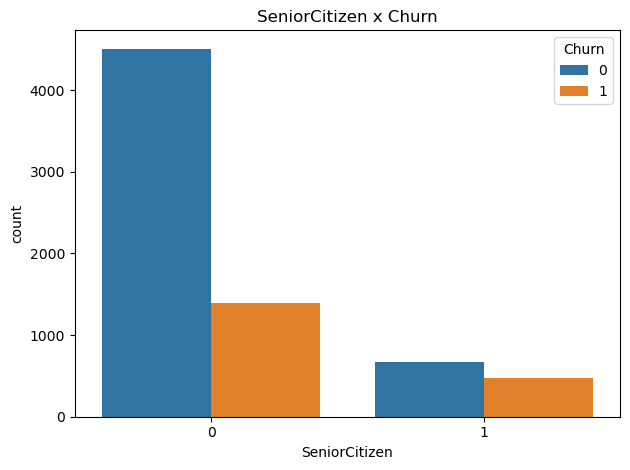

In [80]:
# SeniorCitizen x Churn
sns.countplot(data=TelecomX, x='SeniorCitizen', hue='Churn')
# Título
plt.title('SeniorCitizen x Churn')
# Ajusta o layout para garantir que nada seja cortado
plt.tight_layout()
plt.show()

Análise por formas de pagamento

In [63]:
# Soma de clientes que cancelaram por método de pagamento
mailed_check_cancelaram = TelecomX[(TelecomX['PaymentMethod'] == 'Mailed check') & (TelecomX['Churn'] == True)].shape[0]
electronic_check_cancelaram = TelecomX[(TelecomX['PaymentMethod'] == 'Electronic check') & (TelecomX['Churn'] == True)].shape[0]
credit_card_cancelaram = TelecomX[(TelecomX['PaymentMethod'] == 'Credit card (automatic)') & (TelecomX['Churn'] == True)].shape[0]
bank_transfer_cancelaram = TelecomX[(TelecomX['PaymentMethod'] == 'Bank transfer (automatic)') & (TelecomX['Churn'] == True)].shape[0]

# Soma de clientes que não cancelaram por método de pagamento
mailed_check_nao_cancelaram = TelecomX[(TelecomX['PaymentMethod'] == 'Mailed check') & (TelecomX['Churn'] == False)].shape[0]
electronic_check_nao_cancelaram = TelecomX[(TelecomX['PaymentMethod'] == 'Electronic check') & (TelecomX['Churn'] == False)].shape[0]
credit_card_nao_cancelaram = TelecomX[(TelecomX['PaymentMethod'] == 'Credit card (automatic)') & (TelecomX['Churn'] == False)].shape[0]
bank_transfer_nao_cancelaram = TelecomX[(TelecomX['PaymentMethod'] == 'Bank transfer (automatic)') & (TelecomX['Churn'] == False)].shape[0]

# Print dos resultados absolutos
print(f'Mailed check - Cancelaram: {mailed_check_cancelaram}')
print(f'Mailed check - Não cancelaram: {mailed_check_nao_cancelaram}')
print(f'Electronic check - Cancelaram: {electronic_check_cancelaram}')
print(f'Electronic check - Não cancelaram: {electronic_check_nao_cancelaram}')
print(f'Credit card (automatic) - Cancelaram: {credit_card_cancelaram}')
print(f'Credit card (automatic) - Não cancelaram: {credit_card_nao_cancelaram}')
print(f'Bank transfer (automatic) - Cancelaram: {bank_transfer_cancelaram}')
print(f'Bank transfer (automatic) - Não cancelaram: {bank_transfer_nao_cancelaram}')
print()

# Totais por método
total_mailed = TelecomX[TelecomX['PaymentMethod'] == 'Mailed check'].shape[0]
total_electronic = TelecomX[TelecomX['PaymentMethod'] == 'Electronic check'].shape[0]
total_credit = TelecomX[TelecomX['PaymentMethod'] == 'Credit card (automatic)'].shape[0]
total_bank = TelecomX[TelecomX['PaymentMethod'] == 'Bank transfer (automatic)'].shape[0]

# Porcentagens por método
porcentagem_mailed_cancelaram = (mailed_check_cancelaram / total_mailed) * 100
porcentagem_mailed_nao_cancelaram = (mailed_check_nao_cancelaram / total_mailed) * 100

porcentagem_electronic_cancelaram = (electronic_check_cancelaram / total_electronic) * 100
porcentagem_electronic_nao_cancelaram = (electronic_check_nao_cancelaram / total_electronic) * 100

porcentagem_credit_cancelaram = (credit_card_cancelaram / total_credit) * 100
porcentagem_credit_nao_cancelaram = (credit_card_nao_cancelaram / total_credit) * 100

porcentagem_bank_cancelaram = (bank_transfer_cancelaram / total_bank) * 100
porcentagem_bank_nao_cancelaram = (bank_transfer_nao_cancelaram / total_bank) * 100

# Print das porcentagens
print(f'Porcentagem que cancelaram (Mailed check): {porcentagem_mailed_cancelaram:.2f}%')
print(f'Porcentagem que não cancelaram (Mailed check): {porcentagem_mailed_nao_cancelaram:.2f}%')
print(f'Porcentagem que cancelaram (Electronic check): {porcentagem_electronic_cancelaram:.2f}%')
print(f'Porcentagem que não cancelaram (Electronic check): {porcentagem_electronic_nao_cancelaram:.2f}%')
print(f'Porcentagem que cancelaram (Credit card automatic): {porcentagem_credit_cancelaram:.2f}%')
print(f'Porcentagem que não cancelaram (Credit card automatic): {porcentagem_credit_nao_cancelaram:.2f}%')
print(f'Porcentagem que cancelaram (Bank transfer automatic): {porcentagem_bank_cancelaram:.2f}%')
print(f'Porcentagem que não cancelaram (Bank transfer automatic): {porcentagem_bank_nao_cancelaram:.2f}%')


Mailed check - Cancelaram: 308
Mailed check - Não cancelaram: 1304
Electronic check - Cancelaram: 1071
Electronic check - Não cancelaram: 1294
Credit card (automatic) - Cancelaram: 232
Credit card (automatic) - Não cancelaram: 1290
Bank transfer (automatic) - Cancelaram: 258
Bank transfer (automatic) - Não cancelaram: 1286

Porcentagem que cancelaram (Mailed check): 19.11%
Porcentagem que não cancelaram (Mailed check): 80.89%
Porcentagem que cancelaram (Electronic check): 45.29%
Porcentagem que não cancelaram (Electronic check): 54.71%
Porcentagem que cancelaram (Credit card automatic): 15.24%
Porcentagem que não cancelaram (Credit card automatic): 84.76%
Porcentagem que cancelaram (Bank transfer automatic): 16.71%
Porcentagem que não cancelaram (Bank transfer automatic): 83.29%


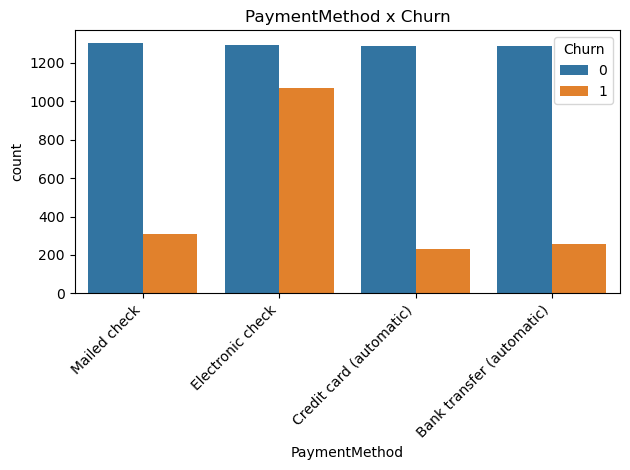

In [76]:
# PaymentMethod x Churn
sns.countplot(data=TelecomX, x='PaymentMethod', hue='Churn')
# Título
plt.title('PaymentMethod x Churn')
# Rotaciona os rótulos do eixo X
plt.xticks(rotation=45, ha='right')
# Ajusta o layout para garantir que nada seja cortado
plt.tight_layout()
plt.show()

In [78]:
# Soma de clientes que cancelaram por tipo de contrato
one_year_cancelaram = TelecomX[(TelecomX['Contract'] == 'One year') & (TelecomX['Churn'] == True)].shape[0]
month_to_month_cancelaram = TelecomX[(TelecomX['Contract'] == 'Month-to-month') & (TelecomX['Churn'] == True)].shape[0]
two_year_cancelaram = TelecomX[(TelecomX['Contract'] == 'Two year') & (TelecomX['Churn'] == True)].shape[0]

# Soma de clientes que não cancelaram por tipo de contrato
one_year_nao_cancelaram = TelecomX[(TelecomX['Contract'] == 'One year') & (TelecomX['Churn'] == False)].shape[0]
month_to_month_nao_cancelaram = TelecomX[(TelecomX['Contract'] == 'Month-to-month') & (TelecomX['Churn'] == False)].shape[0]
two_year_nao_cancelaram = TelecomX[(TelecomX['Contract'] == 'Two year') & (TelecomX['Churn'] == False)].shape[0]

# Print dos resultados absolutos
print(f'One year - Cancelaram: {one_year_cancelaram}')
print(f'One year - Não cancelaram: {one_year_nao_cancelaram}')
print(f'Month-to-month - Cancelaram: {month_to_month_cancelaram}')
print(f'Month-to-month - Não cancelaram: {month_to_month_nao_cancelaram}')
print(f'Two year - Cancelaram: {two_year_cancelaram}')
print(f'Two year - Não cancelaram: {two_year_nao_cancelaram}')
print()

# Totais por tipo de contrato
total_one_year = TelecomX[TelecomX['Contract'] == 'One year'].shape[0]
total_month_to_month = TelecomX[TelecomX['Contract'] == 'Month-to-month'].shape[0]
total_two_year = TelecomX[TelecomX['Contract'] == 'Two year'].shape[0]

# Porcentagens por tipo de contrato
porcentagem_one_year_cancelaram = (one_year_cancelaram / total_one_year) * 100
porcentagem_one_year_nao_cancelaram = (one_year_nao_cancelaram / total_one_year) * 100

porcentagem_month_to_month_cancelaram = (month_to_month_cancelaram / total_month_to_month) * 100
porcentagem_month_to_month_nao_cancelaram = (month_to_month_nao_cancelaram / total_month_to_month) * 100

porcentagem_two_year_cancelaram = (two_year_cancelaram / total_two_year) * 100
porcentagem_two_year_nao_cancelaram = (two_year_nao_cancelaram / total_two_year) * 100

# Print das porcentagens
print(f'Porcentagem que cancelaram (One year): {porcentagem_one_year_cancelaram:.2f}%')
print(f'Porcentagem que não cancelaram (One year): {porcentagem_one_year_nao_cancelaram:.2f}%')
print(f'Porcentagem que cancelaram (Month-to-month): {porcentagem_month_to_month_cancelaram:.2f}%')
print(f'Porcentagem que não cancelaram (Month-to-month): {porcentagem_month_to_month_nao_cancelaram:.2f}%')
print(f'Porcentagem que cancelaram (Two year): {porcentagem_two_year_cancelaram:.2f}%')
print(f'Porcentagem que não cancelaram (Two year): {porcentagem_two_year_nao_cancelaram:.2f}%')

One year - Cancelaram: 166
One year - Não cancelaram: 1307
Month-to-month - Cancelaram: 1655
Month-to-month - Não cancelaram: 2220
Two year - Cancelaram: 48
Two year - Não cancelaram: 1647

Porcentagem que cancelaram (One year): 11.27%
Porcentagem que não cancelaram (One year): 88.73%
Porcentagem que cancelaram (Month-to-month): 42.71%
Porcentagem que não cancelaram (Month-to-month): 57.29%
Porcentagem que cancelaram (Two year): 2.83%
Porcentagem que não cancelaram (Two year): 97.17%


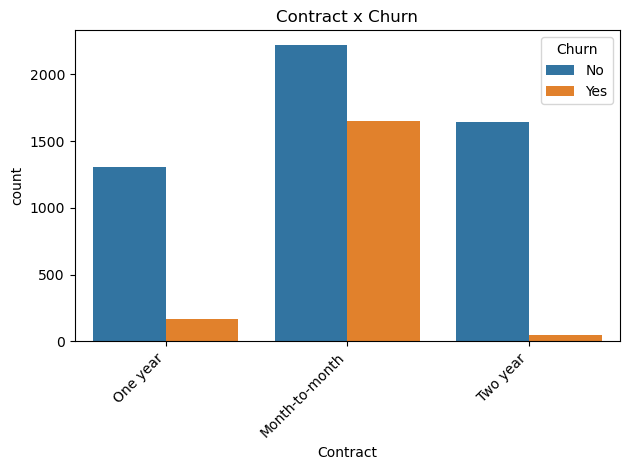

In [107]:
# Contract x Churn
sns.countplot(data=TelecomX, x='Contract', hue='Churn')
# Título
plt.title('Contract x Churn')
# Rotaciona os rótulos do eixo X
plt.xticks(rotation=45, ha='right')
# Ajusta o layout para garantir que nada seja cortado
plt.tight_layout()
plt.show()

# Visualização dos dados

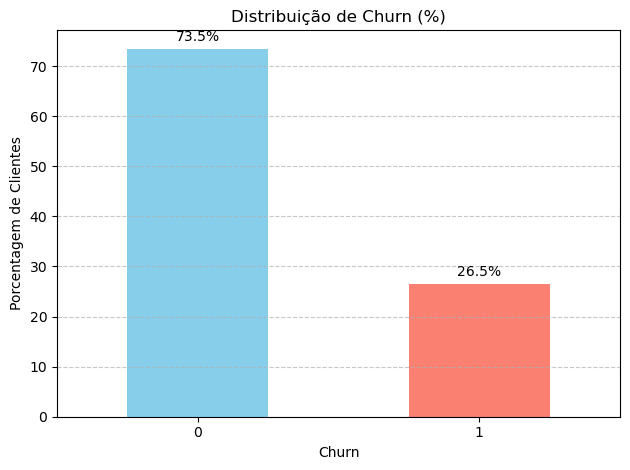

In [53]:
# Distribuição de Churn em porcentagem
churn_percent = TelecomX['Churn'].value_counts(normalize=True) * 100

# Plotando o gráfico
ax = churn_percent.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Distribuição de Churn (%)')
plt.xlabel('Churn')
plt.ylabel('Porcentagem de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar texto em cima de cada barra
for i, value in enumerate(churn_percent):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


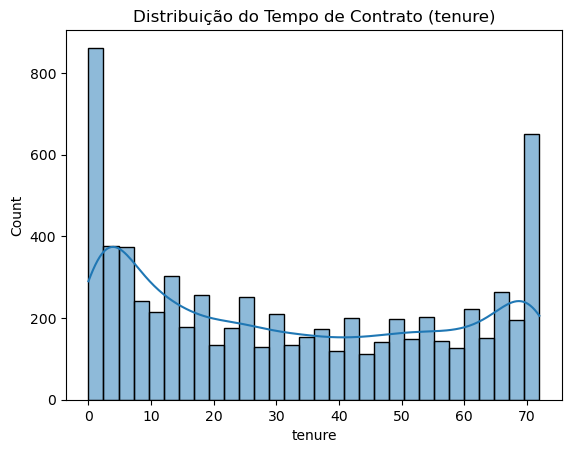

In [84]:
# Análise do tempo de contrato (tenure)
sns.histplot(TelecomX['tenure'], bins=30, kde=True)
plt.title("Distribuição do Tempo de Contrato (tenure)")
plt.show()


In [46]:
TelecomX.to_excel("TelecomX_limpo.xlsx", index=False)
